In [1]:
#Importing required libraries
import pandas as pd
import gensim
from gensim.utils import simple_preprocess
from gensim import corpora, models
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import nltk
from gensim import corpora, models
import Kmeans
import LOF
from numpy import dot, mean, array
import importlib
%matplotlib inline

In [2]:
#Importing stopwords file
with open('./stopwords.txt') as stopwords:
    stopwords=stopwords.read().split('\n')

In [3]:
#Additional document specific stopwords 
additional_stop_words=['apple','nokia','oneplus','realme','samsung','xiaomi','huawei','blackberry','eula']

#Function to tokenize documents
def tokenize(doc):
    word_list=[]
    for word in doc.split(' '):
        word_list.append(word)
    #stemmer = SnowballStemmer("english")
    token_list=[]
    for word_token in gensim.utils.simple_preprocess(doc):
        if word_token not in gensim.parsing.preprocessing.STOPWORDS and word_token not in stopwords and word_token not in additional_stop_words:
            token_list.append((WordNetLemmatizer().lemmatize(word_token,pos='v')))
    stoppedTokens = [i for i in token_list]
    return ' '.join(stoppedTokens)

#Importing dataset
import os
files=os.listdir('./data')


doc_reader={}
for file in files:
    with open('./data/'+file,encoding='utf-8') as f:
        doc_reader[file]=f.read()

In [4]:
# list for tokenized documents in loop
texts = []
for file in doc_reader:
    # clean and tokenize document string
    tokens = tokenize(doc_reader[file]).split()


    # stem tokens
    # stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    # add tokens to list
    texts.append(tokens)


In [5]:
# list for tokenized documents in loop
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+') 
texts = []
for file in doc_reader:
    print(file)
    # clean and tokenize document string
    raw = doc_reader[file].lower()
    tokens = tokenizer.tokenize(tokenize(raw))


    # stem tokens
    # stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]

    # add tokens to list
    texts.append(tokens)


AppleEndUser.txt
BlackberryEndUser.txt
HuaweiEndUser.txt
nokia-agreement.txt
OneplusUser.txt
RealMeEndUser.txt
SamsungEndUser.txt
XiaomiEndUser.txt


In [6]:
dictL = corpora.Dictionary(texts)
# convert tokenized documents into a document-term matrix
corp = [dictL.doc2bow(text) for text in texts]

for doc in corp:
    print([[dictL[id], freq] for id, freq in doc])


[['abuse', 1], ['acceptance', 1], ['access', 3], ['accessible', 1], ['accompany', 1], ['accuracy', 2], ['acknowledge', 1], ['advice', 1], ['advise', 1], ['agents', 1], ['agree', 7], ['agreement', 7], ['app', 6], ['applicable', 9], ['application', 31], ['apply', 3], ['apps', 1], ['arise', 3], ['assume', 1], ['attempt', 1], ['authorize', 2], ['automatically', 1], ['biological', 1], ['brand', 1], ['business', 1], ['california', 2], ['case', 1], ['cause', 1], ['change', 1], ['chemical', 1], ['choose', 1], ['citizen', 3], ['claim', 2], ['clara', 1], ['code', 1], ['collect', 1], ['collectively', 1], ['commerce', 1], ['commercial', 7], ['compliance', 1], ['comply', 1], ['components', 1], ['condition', 3], ['conflict', 2], ['consent', 1], ['consequential', 2], ['consist', 1], ['consistent', 1], ['consumer', 1], ['content', 2], ['contract', 1], ['control', 1], ['convention', 1], ['copy', 1], ['copyright', 1], ['correction', 1], ['cost', 1], ['countries', 2], ['country', 4], ['county', 1], ['cou

# Topic Modelling using Bag of Words

In [7]:
#LDA Model using Bag of words
lda_model = gensim.models.LdaMulticore(corp, num_topics=20, id2word=dictL, passes=2, workers=2)

for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.014*"service" + 0.013*"software" + 0.009*"party" + 0.009*"information" + 0.008*"agreement" + 0.007*"provide" + 0.006*"include" + 0.006*"account" + 0.006*"term" + 0.006*"update"
Topic: 1 
Words: 0.028*"software" + 0.010*"service" + 0.009*"update" + 0.009*"party" + 0.009*"agreement" + 0.006*"provide" + 0.005*"website" + 0.005*"information" + 0.005*"device" + 0.005*"right"
Topic: 2 
Words: 0.015*"agreement" + 0.014*"service" + 0.013*"information" + 0.009*"software" + 0.008*"provide" + 0.007*"account" + 0.007*"right" + 0.006*"party" + 0.006*"include" + 0.006*"content"
Topic: 3 
Words: 0.038*"service" + 0.020*"site" + 0.020*"information" + 0.019*"agreement" + 0.017*"account" + 0.014*"party" + 0.014*"content" + 0.012*"license" + 0.010*"products" + 0.010*"agree"
Topic: 4 
Words: 0.021*"software" + 0.012*"service" + 0.010*"party" + 0.009*"agreement" + 0.007*"term" + 0.007*"website" + 0.006*"information" + 0.006*"content" + 0.005*"provide" + 0.005*"device"
Topic: 5 
Words: 0.

# Topic Modelling using TF/IDF

In [8]:
#LDA Model using TF-IDF
tfidf = models.TfidfModel(corp)
corpus_tfidf = tfidf[corp]
#for doc in corpus_tfidf:
 #   print(doc)
    
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=20, id2word=dictL, passes=2, workers=4)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.001*"administrative" + 0.001*"adults" + 0.001*"accurate" + 0.001*"address" + 0.001*"adjustments" + 0.001*"accidental" + 0.001*"amendment" + 0.001*"amend" + 0.001*"york" + 0.001*"aim"
Topic: 1 Word: 0.007*"enterprise" + 0.003*"subscription" + 0.003*"trial" + 0.003*"ontario" + 0.003*"subsidiaries" + 0.002*"recover" + 0.002*"acquire" + 0.002*"canada" + 0.002*"age" + 0.002*"permissible"
Topic: 2 Word: 0.001*"device" + 0.001*"applications" + 0.001*"mobile" + 0.001*"licence" + 0.001*"feature" + 0.001*"certificate" + 0.001*"identifier" + 0.001*"message" + 0.001*"diagnostic" + 0.001*"membership"
Topic: 3 Word: 0.004*"applications" + 0.004*"device" + 0.003*"mobile" + 0.003*"feature" + 0.003*"message" + 0.002*"diagnostic" + 0.002*"identifier" + 0.002*"certificate" + 0.002*"staff" + 0.002*"menu"
Topic: 4 Word: 0.001*"administrative" + 0.001*"adults" + 0.001*"accurate" + 0.001*"address" + 0.001*"adjustments" + 0.001*"accidental" + 0.001*"amendment" + 0.001*"amend" + 0.001*"york" +

In [9]:
#Gettings topics with normalized weights.
def getTopicsWithNormalizedWeight(model):
    topicCoherencePair = dict()
    #print(model.print_topics(num_topics=5))
    topics = list()
    for mdl in model.print_topics(num_topics=10):
        tokenList = list()
        #print(mdl)
        mdl=str(mdl)[1:-1]
        valL = mdl.split(' + ')
        for pair in valL[1:]:
            #print(pair[:5])
            val = float(pair[:5])
            topic = pair[6:]
            tokenList.append(topic)
            if topic in topicCoherencePair:
                topicCoherencePair[topic] += val
            else:
                topicCoherencePair[topic] = val
        topics.append(tokenList)

    # normalize the topics
    norm = 0
    for topic, val in topicCoherencePair.items():
        norm += val

    for topic, val in topicCoherencePair.items():
        topicCoherencePair[topic] = val / norm

    return topics

topics = getTopicsWithNormalizedWeight(lda_model)

clean_topics=[]
for topic in topics:
    clean_topics.append([word.replace("\"","") for word in topic])
    
clean_topics

[['agreement',
  'service',
  'license',
  'term',
  'include',
  'party',
  'information',
  'right',
  "provide'"],
 ['agreement',
  'service',
  'user',
  'party',
  'software',
  'information',
  'content',
  'term',
  "include'"],
 ['agreement',
  'software',
  'service',
  'information',
  'user',
  'party',
  'term',
  'include',
  "right'"],
 ['site',
  'information',
  'agreement',
  'account',
  'party',
  'content',
  'license',
  'products',
  "agree'"],
 ['software',
  'party',
  'information',
  'agreement',
  'provide',
  'include',
  'account',
  'term',
  "update'"],
 ['service',
  'party',
  'information',
  'account',
  'website',
  'user',
  'right',
  'include',
  "software'"],
 ['service',
  'update',
  'party',
  'agreement',
  'provide',
  'website',
  'information',
  'device',
  "right'"],
 ['website',
  'content',
  'user',
  'information',
  'service',
  'software',
  'party',
  'include',
  "term'"],
 ['device',
  'service',
  'mobile',
  'party',
  'update

In [10]:
#Finding topics with normalized weights from tf-idf matrix
topics_tfidf = getTopicsWithNormalizedWeight(lda_model_tfidf)

clean_topics_tfidf=[]
for topic in topics_tfidf:
    clean_topics_tfidf.append([word.replace("\"","") for word in topic])
    
clean_topics_tfidf

[['subscription',
  'trial',
  'ontario',
  'subsidiaries',
  'recover',
  'acquire',
  'canada',
  'age',
  "permissible'"],
 ['adults',
  'accurate',
  'address',
  'adjustments',
  'accidental',
  'amendment',
  'amend',
  'york',
  "aim'"],
 ['adults',
  'accurate',
  'address',
  'adjustments',
  'accidental',
  'amendment',
  'amend',
  'york',
  "aim'"],
 ['bear',
  'mi',
  'release',
  'account',
  'suspend',
  'post',
  'register',
  'address',
  "cooperators'"],
 ['adults',
  'accurate',
  'address',
  'adjustments',
  'accidental',
  'amendment',
  'amend',
  'york',
  "aim'"],
 ['adults',
  'accurate',
  'address',
  'adjustments',
  'accidental',
  'amendment',
  'amend',
  'york',
  "aim'"],
 ['adults',
  'accurate',
  'address',
  'adjustments',
  'accidental',
  'amendment',
  'amend',
  'york',
  "aim'"],
 ['account',
  'experience',
  'register',
  'creator',
  'confidential',
  'audit',
  'camera',
  'feedback',
  "library'"],
 ['wi',
  'basic',
  'device',
  'featur

# Summarizing unseen document

In [14]:
#importlib.reload(sys)
#sys.setdefaultencoding('utf8')
tokenizer_old = nltk.data.load('tokenizers/punkt/english.pickle')
tokenizer = RegexpTokenizer(r'\w+')

#inputSrc = './SonyEndUser.txt'
minTokenNum = 3
tokenList = list()
sentenceList = list()

r = re.compile('[A-Za-z]+')
deleteSet = set(['a', 'an', 'and', 'or', 'the'])
with open('./SonyEndUser.txt',encoding='utf-8') as f:
    doc=f.read()
#text = 'this assignment service information provide agree. Read this Agreement carefully before installing, downloading, or using the Software. By clicking on the "I Accept" button while installing, downloading, and/or using the Software, You agree to the terms and conditions of this Agreement. If You do not agree to all of the terms and conditions of this Agreement, promptly click the "Decline" or "I Do Not Accept" button, cancel the installation or downloading, or destroy or return the Software and accompanying documentation to Sony Mobile. YOU AGREE THAT YOUR USE OF THE SOFTWARE ACKNOWLEDGES THAT YOU HAVE READ THIS AGREEMENT, UNDERSTAND IT, AND AGREE TO BE BOUND BY ITS TERMS AND CONDITIONS.'


def tokenize_cpy(ct):
    # modify this function for different strategies of tokenizing
    # remove greek numbers, preps,
    # all words should be small case.
    resultSentences = list()
    sentences = tokenizer_old.tokenize(ct)
    for sentence in sentences:
        tokens = r.findall(sentence.lower())
        resultSentences.append(" ".join([token for token in tokens if token not in deleteSet]))

    return resultSentences


sentences = tokenize_cpy(doc)
print(len(sentences))
sentences

87


['end user license agreement this software agreement agreement is between you either individual entity end user sony mobile communications inc sony mobile',
 'agreement authorizes you to use software specified in clause below which may be stored on cd rom sent to you by electronic mail downloaded from sony mobile s web pages servers from other sources solely under terms conditions set forth below',
 'this is agreement on end user rights not agreement for sale',
 'except as provided elsewhere in this agreement sony mobile its licensors continues to own copy of software physical media contained in sales package any other copy that you are authorized to make pursuant to this agreement',
 'read this agreement carefully before installing downloading using software',
 'by clicking on i accept button while installing downloading using software you agree to terms conditions of this agreement',
 'if you do not agree to all of terms conditions of this agreement promptly click decline i do not ac

# LDA using token of words

In [15]:
minTokenNum = 3
tokenList = list()
sentenceList = list()

for sentence in sentences:
    tmpTokens = sentence.split()
    for topic in clean_topics:
        tokens = list()
        for token in tmpTokens:
            if token in topic:
                tokens.append(token)
        if len(tokens) >= minTokenNum:
            break
        else:
            tokenList.append(tokens)
            if sentence not in sentenceList:
                sentenceList.append(sentence)
                
print(len(sentenceList))
sentenceList

72


['agreement authorizes you to use software specified in clause below which may be stored on cd rom sent to you by electronic mail downloaded from sony mobile s web pages servers from other sources solely under terms conditions set forth below',
 'this is agreement on end user rights not agreement for sale',
 'except as provided elsewhere in this agreement sony mobile its licensors continues to own copy of software physical media contained in sales package any other copy that you are authorized to make pursuant to this agreement',
 'read this agreement carefully before installing downloading using software',
 'by clicking on i accept button while installing downloading using software you agree to terms conditions of this agreement',
 'if you do not agree to all of terms conditions of this agreement promptly click decline i do not accept button cancel installation downloading destroy return software accompanying documentation to sony mobile',
 'you agree that your use of software acknowl

# LDA using TF/IDF

In [16]:
minTokenNum = 3
tokenList = list()
sentenceList = list()

for sentence in sentences:
    tmpTokens = sentence.split()
    for topic in clean_topics_tfidf:
        tokens = list()
        for token in tmpTokens:
            if token in topic:
                tokens.append(token)
        if len(tokens) >= minTokenNum:
            break
        else:
            tokenList.append(tokens)
            if sentence not in sentenceList:
                sentenceList.append(sentence)
                
print(len(sentenceList))
sentenceList

77


['end user license agreement this software agreement agreement is between you either individual entity end user sony mobile communications inc sony mobile',
 'agreement authorizes you to use software specified in clause below which may be stored on cd rom sent to you by electronic mail downloaded from sony mobile s web pages servers from other sources solely under terms conditions set forth below',
 'this is agreement on end user rights not agreement for sale',
 'except as provided elsewhere in this agreement sony mobile its licensors continues to own copy of software physical media contained in sales package any other copy that you are authorized to make pursuant to this agreement',
 'read this agreement carefully before installing downloading using software',
 'by clicking on i accept button while installing downloading using software you agree to terms conditions of this agreement',
 'if you do not agree to all of terms conditions of this agreement promptly click decline i do not ac

# Non-negative Matrix Factorization

In [17]:
#Non-negative Matrix Factorization to find topics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import numpy as np

documentText=[]
for file in doc_reader:
    documentText.append(tokenize(doc_reader[file]))

vectorizer = TfidfVectorizer()
dtm = vectorizer.fit_transform(documentText)


words=np.array(vectorizer.get_feature_names())


model = NMF(n_components=20, random_state=0)
model.fit(dtm)

topics_nmf=[]
words_in_topic = model.components_
for i in range(words_in_topic.shape[0]):
    print("Topic {}".format(i+1))
    print(words[np.argsort(words_in_topic[i])[-10:]])
    topics_nmf.append(words[np.argsort(words_in_topic[i])[-10:]])

Topic 1
['right' 'data' 'update' 'information' 'provide' 'include' 'device'
 'party' 'service' 'software']
Topic 2
['account' 'right' 'user' 'include' 'website' 'term' 'service' 'party'
 'agreement' 'information']
Topic 3
['section' 'instal' 'install' 'agreement' 'privacy' 'update' 'download'
 'party' 'information' 'software']
Topic 4
['address' 'platform' 'products' 'provide' 'agreement' 'experience'
 'register' 'information' 'service' 'account']
Topic 5
['provide' 'bear' 'agree' 'party' 'user' 'information' 'content' 'service'
 'agreement' 'site']
Topic 6
['damage' 'right' 'law' 'application' 'applicable' 'include' 'term'
 'party' 'license' 'service']
Topic 7
['acquire' 'exclude' 'license' 'ontario' 'trial' 'subsidiaries'
 'subscription' 'software' 'enterprise' 'service']
Topic 8
['generate' 'ins' 'plug' 'unauthorized' 'link' 'hypertext' 'content'
 'agreement' 'user' 'website']
Topic 9
['unite' 'agree' 'state' 'app' 'custom' 'standard' 'license' 'licensor'
 'external' 'application']


In [19]:
#Summarised document after applying NMF
minTokenNum = 3
tokenList = list()
sentenceList = list()

for sentence in sentences:
    tmpTokens = sentence.split()
    for topic in topics_nmf:
        tokens = list()
        for token in tmpTokens:
            if token in topic:
                tokens.append(token)
        if len(tokens) >= minTokenNum:
            break
        else:
            
            if sentence not in sentenceList:
                tokenList.append(tokens)
                sentenceList.append(sentence)
        
print(len(sentenceList))
sentenceList

69


['end user license agreement this software agreement agreement is between you either individual entity end user sony mobile communications inc sony mobile',
 'agreement authorizes you to use software specified in clause below which may be stored on cd rom sent to you by electronic mail downloaded from sony mobile s web pages servers from other sources solely under terms conditions set forth below',
 'this is agreement on end user rights not agreement for sale',
 'except as provided elsewhere in this agreement sony mobile its licensors continues to own copy of software physical media contained in sales package any other copy that you are authorized to make pursuant to this agreement',
 'read this agreement carefully before installing downloading using software',
 'by clicking on i accept button while installing downloading using software you agree to terms conditions of this agreement',
 'if you do not agree to all of terms conditions of this agreement promptly click decline i do not ac

# Word Embeddings using word2vec

In [23]:
#Collating all the words into one file
f = open('vocab.txt', 'w+')
f.write(' ')
for file in files:
    f.write(tokenize(doc_reader[file]))
f.close()

#Applying word2vec model
model = gensim.models.Word2Vec()
trainSentences = gensim.models.word2vec.LineSentence('./vocab.txt')
model.build_vocab(trainSentences)
model.train(trainSentences, total_examples=model.corpus_count, epochs=30)
model.save('word2vecModel')

tokenlist=[]
for sentence in sentences:
    tokenlist.append(sentence.split(' '))
    

word2vecModel = gensim.models.Word2Vec.load('word2vecModel')
musR, assignmentsIndexListR, assignmentsR, vectorListR = Kmeans.kmeans(tokenlist, word2vecModel, 1000, 1)



# Implmenting anomaly detection:
# Use Local Outlier Factor to detect if a point is likely to be an anomaly.
lof = LOF.LOF(musR, assignmentsIndexListR, vectorListR, 6)
lofList = list()
print('LOF values by index')
for ptIndex in range(len(assignmentsIndexListR)):
    lofPt = lof.calcLOF(ptIndex)
    lofList.append(lofPt)
    print(ptIndex, lofPt)

lofIdList = list();
anormalySentences = list()
for lofId in range(len(lofList)):
    if lofList[lofId] > 1.0: # now try to find inliners
        # print sentenceList[lofId]
        lofIdList.append(lofId)
        anormalySentences.append((sentences[lofId], lofList[lofId], vectorListR[lofId], lofId))

anormalySentencesReversed = sorted(anormalySentences, key=lambda x: x[1], reverse=True)
anormalySentencesIds = [sentence[3] for sentence in anormalySentencesReversed]


print('Number of Anamolous Sentence: '+str(len(anormalySentences)))
for sentence in anormalySentencesReversed:
    print(sentence[0], sentence[1], sentence[3])


['']
kmeans: in iteration  0
kmeans: in iteration  1
LOF values by index
0 0.998249676547987
1 0.999997468207698
2 0.9998806700937214
3 1.0000012078349656
4 0.999874538874817
5 0.9999878069466982
6 1.0000082476869594
7 0.9999982933440109
8 1.0
9 0.8334230867461624
10 1.00000090225591
11 1.0
12 0.9997639757674334
13 0.9999934821621217
14 0.9999535999506878
15 0.9967545807174739
16 0.9998796553620001
17 0.9995439283163482
18 0.9986609126351951
19 0.9998638464437307
20 0.9999434210829264
21 0.9961442488505576
22 1.0
23 0.996742925934251
24 0.9999916371076418
25 0.9999825244601648
26 0.9999989448929338
27 0.9999399776672965
28 1.0000060955707253
29 0.9999888008734823
30 0.9999885616251665
31 1.0000132664459576
32 0.9999626933163795
33 0.9999812267938449
34 1.000002131532095
35 1.0
36 0.8387439619728033
37 0.9999749710777746
38 0.9999999685239319
39 0.9999946703163248
40 1.0000011588746176
41 1.0
42 0.9997806826531698
43 0.9998584727684898
44 1.0000030309537766
45 0.9999733559612797
46 0.99

# Visualization using t-SNE 

In [25]:
# Visualizing using t-SNE

import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsneModel = TSNE(n_components=3, random_state=0, metric='precomputed')
np.set_printoptions(suppress=True)

r = np.zeros(shape = (len(vectorListR), len(vectorListR)))
for xInd in range(len(vectorListR)):
    x = vectorListR[xInd]
    yList = list()
    for y in vectorListR:
        precomputeResult = 1 - dot(x,y) / (np.linalg.norm(x) * np.linalg.norm(y))
        if precomputeResult < 0:
            print(precomputeResult)
            precomputeResult = 0
        yList.append(precomputeResult)
    r[xInd] = yList

result = tsneModel.fit_transform(r)
print(result)
x = list()
y = list()
z = list()
xa = list()
ya = list()
za = list()
for prInd in range(len(result)):
    pr = result[prInd]
    if prInd not in anormalySentencesIds:
        if abs(pr[0]) <= 50 and abs(pr[1]) <= 50:
            x.append(pr[0])
            y.append(pr[1])
            z.append(pr[2])
    else:
        xa.append(pr[0])
        ya.append(pr[1])
        za.append(pr[2])




-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-1.1920928955078125e-07
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
-2.220446049250313e-16
[[  119.355675     172.99947     -171.96431   ]
 [  -40.412052      78.407104      24.87029   ]
 [   95.77069     -115.37384        3.1006467 ]
 [   28.553165     -91.093765    -135.28566   ]
 [  199.7819       103.34636       42.184643  ]
 [  -98.6514       -77.905136     100.31511   ]
 [  -95.61736        0.55927867   167.00017   ]
 [   34.161144      25.2619        24.265339  ]
 [   66.26304      131.06114       65.19612   ]
 [  182.00589  

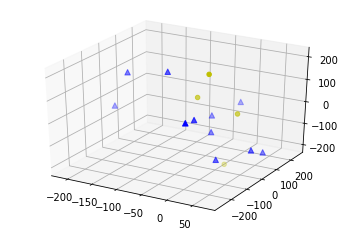

In [26]:
#Plotting t-SNE plot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(array(x), array(y), array(z), c='y', s=20, marker='o')
ax.scatter(array(xa), array(ya), array(za), c='b', s=30, marker='^')
# plt.xlim(-50, 50)
# plt.ylim(-50, 50)
plt.show()